<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/Deep%20Learning%20-%20IA%20Expert/Redes_Neurais_Recorrentes_An%C3%A1lise_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importações

import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from google.colab import drive

In [30]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Curso - Deep Learning/Parte 3 - Redes Neurais Recorrentes/petr4_treinamento.csv')


In [32]:
# Limpando dados nulos

data = data.dropna()

In [33]:
#Separando coluna para utilizar

data_train = data.iloc[:, 1:2].values

In [34]:
#Normalizando os dados

scaler = MinMaxScaler(feature_range=(0, 1))
data_train = scaler.fit_transform(data_train)


In [35]:
#Selecionando os 90 últimos preços como previsores

X = [] # previsores
y = [] # preço real
for i in range(90, 1242): # 90 preços anteriores
  X.append(data_train[i - 90:i, 0])
  y.append(data_train[i, 0])
X, y = np.array(X), np.array(y)

In [36]:
#Criando rede neural recorrente com camadas de memória de longa duração

regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 90, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 90, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 90, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#Compilando rede neural

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [38]:
#Treinando rede neural

regressor.fit(X, y, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - loss: 0.0577 - mean_absolute_error: 0.1773
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - loss: 0.0170 - mean_absolute_error: 0.1054
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - loss: 0.0152 - mean_absolute_error: 0.0979
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - loss: 0.0099 - mean_absolute_error: 0.0767
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 0.0111 - mean_absolute_error: 0.0801
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - loss: 0.0093 - mean_absolute_error: 0.0735
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0085 - mean_absolute_error: 0.0711
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 0.0087 - mean_absolute_error: 0.0699
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0086 - mean_absolute_error: 0.0697
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - loss: 0.0075 - mean_absolute_error: 0.0660
Epoch 11/100
3

In [39]:
#Carregando dados de teste

data_test = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Curso - Deep Learning/Parte 3 - Redes Neurais Recorrentes/petr4_teste.csv')

In [40]:
#Separando coluna que será utilizada

y_test = data_test.iloc[:, 1:2].values

In [41]:
#Concatenando dados

complete_data = pd.concat((data['Open'], data_test['Open']), axis = 0)

In [42]:
#Preparando dados de teste

inputs = complete_data[len(complete_data) - len(data_test) - 90:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [43]:
#Selecionando os 90 últimos preços como previsores

X_test = []
for i in range(90, 112):
  X_test.append(inputs[i - 90:i, 0])

In [44]:
#Preparndo dados de teste

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
#Gerando previsões

pred = regressor.predict(X_test)
pred = scaler.inverse_transform(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


MAE: 0.6705507986894088


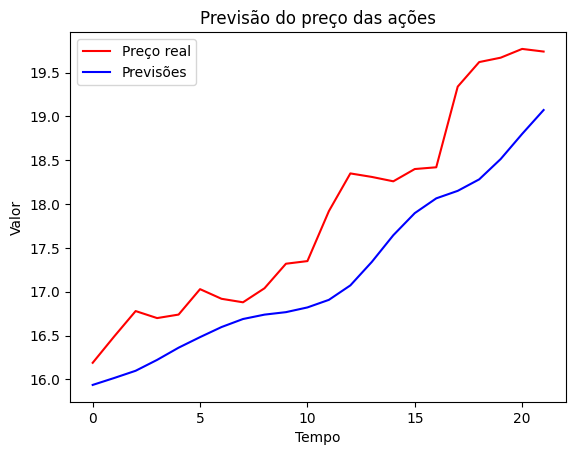

In [46]:
#Avaliando

print(f'MAE: {mean_absolute_error(y_test, pred)}')

#Gerando gráfico

plt.plot(y_test, color = "red", label = "Preço real")
plt.plot(pred, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend();